## 0. Setup & Motivação

Esse projeto consiste em realizar uma EDA em dados de crédito, para confecção do 3º projeto prático do curso de Análise de Dados da EBAC.

Após analisar e entender os dados, meu objetivo será levantar e responder algumas questões sobre os dados.

Caso seja relevante, aplicarei o(s) modelo(s) de Machine Learning adequado(s) para a situação.

Fonte dos dados [aqui](https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset)



<center><b><font size=5><i>Sobre os Dados</i></font></b></center>

---

>Os dados representam informações de clientes de um banco e contam com as seguintes colunas:
>
>**idade** = idade do cliente
>
>**sexo** = sexo do cliente (F ou M)
>
>**dependentes** = número de dependentes do cliente
>
>**escolaridade** = nível de escolaridade do clientes
>
>**salario_anual** = faixa salarial do cliente
>
>**tipo_cartao** = tipo de cartao do cliente
>
>**qtd_produtos** = quantidade de produtos comprados nos últimos 12 meses
>
>**iteracoes_12m** = quantidade de iterações/transacoes nos ultimos 12 meses
>
>**meses_inativo_12m** = quantidade de meses que o cliente ficou inativo
>
>**limite_credito** = limite de credito do cliente
>
>**valor_transacoes_12m** = valor das transações dos ultimos 12 meses
>
>**qtd_transacoes_12m** = quantidade de transacoes dos ultimos 12 meses
>


In [1]:
# Carregando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# Alterando o display para 2 casas decimais
pd.set_option("display.precision", 2)
# Suprimindo notação cientifica
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Carregando os Dados
url = 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/credito.csv'
credit_raw = pd.read_csv(filepath_or_buffer= url)

## 1. Data Wrangling

* Checando a Estrutura

In [3]:
credit_raw.head(10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,na,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,na,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


* Checando as dimensões

In [4]:
print(f'linhas: {credit_raw.shape[0]}\ncolunas: {credit_raw.shape[1]}')

linhas: 10127
colunas: 16


* Checando a presença de linhas duplicadas

In [5]:
credit_raw.duplicated().any()

False

* Checando se existe algum **id** de cliente duplicado

In [6]:
credit_raw['id'].duplicated().any()

False

* Checando os `dtypes`

In [7]:
credit_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

* Checando a Presença de Nulos

In [8]:
credit_raw.isnull().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

* Embora nenhum nulo tenha sido identificado, vimos que logo nas primeiras linhas existem valores `"na"`. Isso é comum, uma vez que o Pandas interpreta uma entrada (na) em uma coluna do tipo object como um texto. Vamos identificar aonde essas ocorrencias estão e quantifica-las.

In [9]:
# Definindo o termo de busca
syntax = 'na'

In [10]:
# Identificando as variáveis
(credit_raw == syntax).any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [11]:
# Observando as linhas em que a varíavel 'escolaridade' é nula
credit_raw[['escolaridade', 'estado_civil', 'salario_anual']].query('escolaridade == @syntax')

,escolaridade,estado_civil,salario_anual
6,na,casado,$120K +
11,na,casado,$40K - $60K
15,na,na,$80K - $120K
17,na,casado,$80K - $120K
23,na,solteiro,menos que $40K
...,...,...,...
10090,na,casado,$40K - $60K
10094,na,solteiro,$60K - $80K
10095,na,casado,$80K - $120K
10118,na,na,$80K - $120K


In [12]:
# Observando as linhas em que a varíavel 'estado_civil' é nula
credit_raw[['escolaridade', 'estado_civil', 'salario_anual']].query('estado_civil == @syntax')

,escolaridade,estado_civil,salario_anual
3,ensino medio,na,menos que $40K
7,ensino medio,na,$60K - $80K
10,sem educacao formal,na,$120K +
13,mestrado,na,$60K - $80K
15,na,na,$80K - $120K
...,...,...,...
10070,ensino medio,na,$80K - $120K
10100,mestrado,na,$60K - $80K
10101,mestrado,na,$40K - $60K
10118,na,na,$80K - $120K


In [13]:
# Observando as linhas em que a varíavel 'salario_anual' é nula
credit_raw[['escolaridade', 'estado_civil', 'salario_anual']].query('salario_anual == @syntax')

,escolaridade,estado_civil,salario_anual
19,mestrado,casado,na
28,sem educacao formal,solteiro,na
39,doutorado,casado,na
44,mestrado,solteiro,na
58,mestrado,casado,na
...,...,...,...
10021,mestrado,casado,na
10040,doutorado,solteiro,na
10083,sem educacao formal,casado,na
10092,mestrado,casado,na


In [14]:
# Olhando mais a fundo: Observando as 3 variáveis juntas
syntax = 'na'
credit_raw[['escolaridade', 'estado_civil', 'salario_anual']].query('escolaridade == @syntax | estado_civil == @syntax | salario_anual == @syntax')

,escolaridade,estado_civil,salario_anual
3,ensino medio,na,menos que $40K
6,na,casado,$120K +
7,ensino medio,na,$60K - $80K
10,sem educacao formal,na,$120K +
11,na,casado,$40K - $60K
...,...,...,...
10101,mestrado,na,$40K - $60K
10118,na,na,$80K - $120K
10119,sem educacao formal,solteiro,na
10123,na,divorciado,$40K - $60K


* Podemos notar que existem pelo menos `3046` linhas em que pelo menos uma das 3 variáveis está faltando. Isso equivale a cerca de `30%` da nossa base de dados.

* Por ora, apenas irei descartar a hipotese de remover as linhas com dados faltantes e não realizar nenhuma modificação. **Este passo será revisitado em breve.**

*Podemos observar também algumas transformações necessárias:*

1. As variáveis `limite_credito` e `valor_transacoes_12m` precisam ser convertidas de object para float.

2. As variáveis `sexo`, `estado_civil`, `tipo_cartao` e `escolaridade` podem ser convertidas de object para category.

3. As variáveis `salario_anual` e `escolaridade` podem ser convertidas de object para category, porém possuem ordem associada (*variáveis ordinais*)

4. As variáveis `id` e `default` podem ser eliminadas, uma vez que não agregam valor.

* Removendo as variáveis `id` e `default` (5)

In [15]:
credit = credit_raw.drop(['id', 'default'], axis= 1).copy()
credit.head()

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


* Tratando as variáveis `limite_credito` e `valor_transacoes_12m` (1)

In [16]:
# Corrigindo o formato dos valores
credit['limite_credito'] = credit['limite_credito'].map(lambda value: value.replace('.','').replace(',','.'))
credit['valor_transacoes_12m'] = credit['valor_transacoes_12m'].map(lambda value: value.replace('.','').replace(',','.'))

In [17]:
# Realizando o type casting
credit['limite_credito'] = credit['limite_credito'].astype('float64')
credit['valor_transacoes_12m'] = credit['valor_transacoes_12m'].astype('float64')

## 2.1 EDA (Univariada)

> Obs. Por fins de aprendizado, irei passar por cada variável relevante e plotar pelo menos um gráfico.

### Idade

* Valores máximo, mínimo, média e decis:

In [18]:
round(credit['idade'].describe(percentiles=np.arange(0.1,1.0,0.1)),2)

count   10127.00
mean       46.33
std         8.02
min        26.00
10%        36.00
20%        39.00
30%        42.00
40%        44.00
50%        46.00
60%        48.00
70%        51.00
80%        53.00
90%        57.00
max        73.00
Name: idade, dtype: float64

> Podemos notar a média bem próxima da mediana, o que sugere uma simetria na distribuição. Isso fica claro quando olhamos para os decis, que não possuem grandes saltos nos valores.

* Idade mais Frequente e Quantidade de Registros

In [19]:
credit['idade'].mode()[0]

44

In [20]:
mask = credit['idade'] == credit['idade'].mode()[0]

credit['idade'][mask].count()

500

* Distribuição das Idades

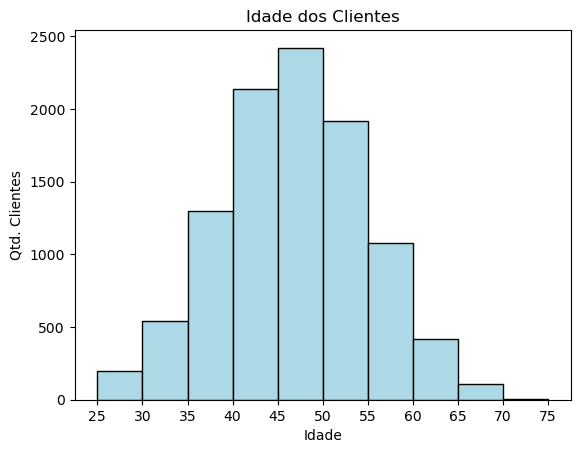

In [21]:
obj = plt.hist(x= credit['idade'], bins= np.array(range(25,80,5)), align= 'mid', edgecolor= 'black', color= 'lightblue')

obj = plt.title('Idade dos Clientes')

obj = plt.xlabel('Idade')

obj = plt.ylabel('Qtd. Clientes')

obj = plt.xticks(np.array(range(25,80,5)))

plt.show(obj)

> Observamos que os clientes, em sua maioria, possuem entre `35` e `60` anos. A média da idade dos clientes é `46` anos, sendo que o cliente mais novo possui `26` anos e o mais velho possui `73`.
>
> Observamos também que a idade mais frequente é `44` anos, com 500 registros.

### Sexo & Estado Civil

* Vamos observar se há predominancia de um gênero nos clientes e seu respectivo estado civil

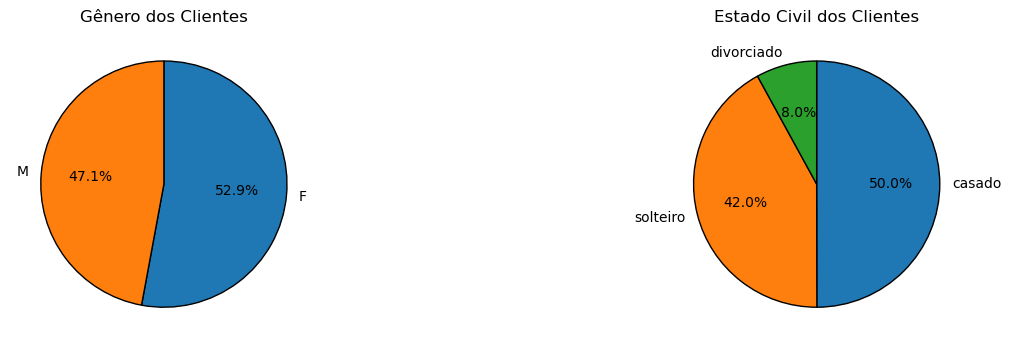

In [22]:
mask = credit['estado_civil'] != 'na'

fig = plt.figure(
    figsize=(10,10),
    layout= 'constrained'
)

ax_mosaic = fig.subplot_mosaic(
    [
        ['a','.','b']
    ]
)

ax_mosaic['a'].pie(
    x = list(credit['sexo'].value_counts().to_dict().values()),
    labels = credit['sexo'].value_counts().to_dict().keys(),
    counterclock= False,
    startangle= 90,
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black'}
)

ax_mosaic['a'].set_title('Gênero dos Clientes')

ax_mosaic['b'].pie(
    x = list(credit['estado_civil'][mask].value_counts().to_dict().values()),
    labels = credit['estado_civil'][mask].value_counts().to_dict().keys(),
    counterclock= False,
    startangle= 90,
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black'}
)

ax_mosaic['b'].set_title('Estado Civil dos Clientes')

plt.show()

> Embora maioria dos clientes sejam mulheres, os dados estão bem distribuídos.

### Grau de Escolaridade

* Distribuição do Grau de Escolaridade

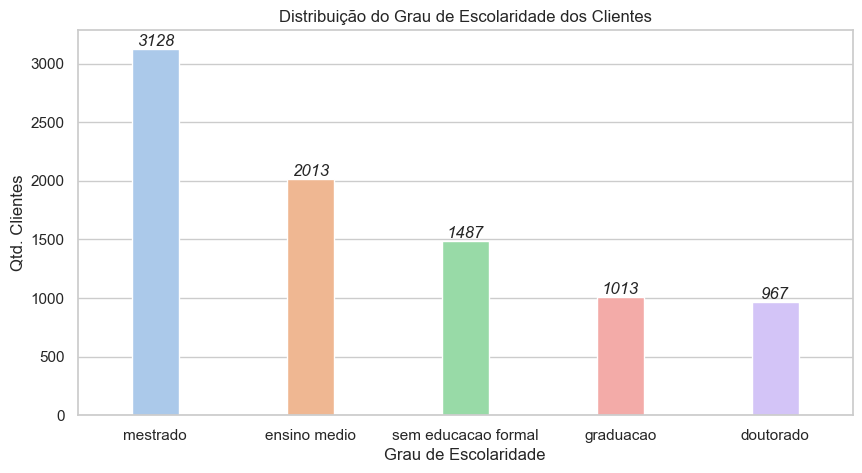

In [23]:
obj = plt.figure(figsize=(10,5))
sns.set_theme(style= 'whitegrid')

obj = sns.countplot(
    data = credit.query('escolaridade != "na"'),
    x = 'escolaridade',
    width= 0.3,
    palette= sns.color_palette('pastel'),
    order= credit.query('escolaridade != "na"')['escolaridade'].value_counts(ascending= False).index
)

obj.set_xlabel('Grau de Escolaridade')
obj.set_ylabel('Qtd. Clientes')
obj.set_title('Distribuição do Grau de Escolaridade dos Clientes')

for p in obj.patches:
    obj.annotate(f'{p.get_height():.0f}',
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', 
                 va='bottom',
                 fontstyle= 'oblique'
                 )

plt.show(obj)

> O grau de escolaridade mais comum dos clientes é o *mestrado*.
>
> O grau de escolaridade é uma variável com alta quantidade de valores faltantes (como vimos na etapa de data wrangling)

### Dependentes

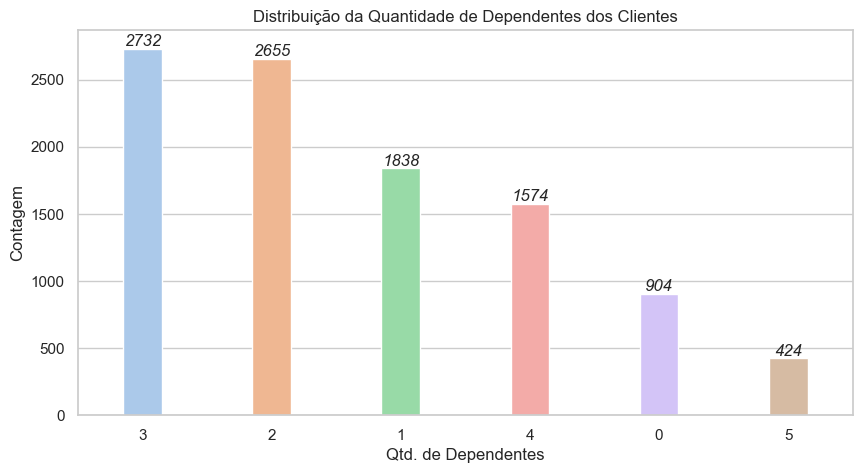

In [24]:
obj = plt.figure(figsize=(10,5))
sns.set_theme(style= 'whitegrid')

obj = sns.countplot(
    data = credit,
    x = 'dependentes',
    width= 0.3,
    palette= sns.color_palette('pastel'),
    order= credit['dependentes'].value_counts(ascending= False).index
)

obj.set_xlabel('Qtd. de Dependentes')
obj.set_ylabel('Contagem')
obj.set_title('Distribuição da Quantidade de Dependentes dos Clientes')

for p in obj.patches:
    obj.annotate(f'{p.get_height():.0f}',
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', 
                 va='bottom',
                 fontstyle= 'oblique'
                 )

plt.show(obj)

> Apenas ~9% dos clientes não possuem dependentes.
>
> Aproximadamente 53% dos clientes possuem 2 ou 3 dependentes.

### Salario Anual

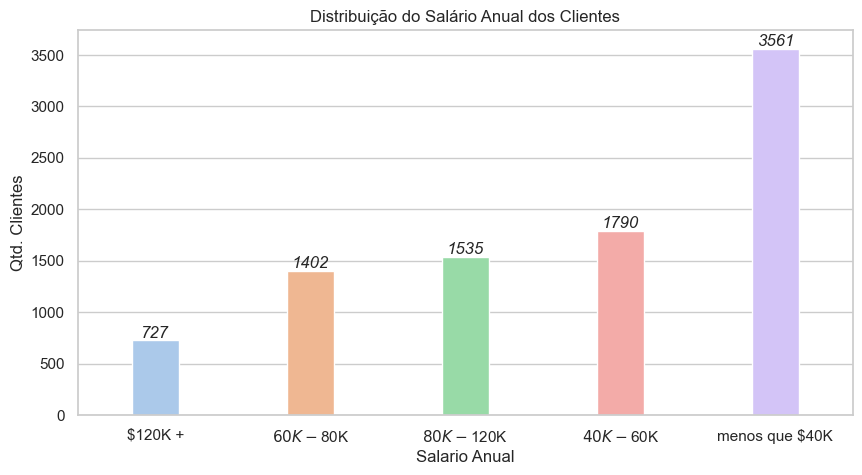

In [25]:
obj = plt.figure(figsize=(10,5))
sns.set_theme(style= 'whitegrid')

obj = sns.countplot(
    data = credit.query('salario_anual != "na"'),
    x = 'salario_anual',
    width= 0.3,
    palette= sns.color_palette('pastel'),
    order= credit.query('salario_anual != "na"')['salario_anual'].value_counts(ascending= True).index
)

obj.set_xlabel('Salario Anual')
obj.set_ylabel('Qtd. Clientes')
obj.set_title('Distribuição do Salário Anual dos Clientes')

for p in obj.patches:
    obj.annotate(f'{p.get_height():.0f}',
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', 
                 va='bottom',
                 fontstyle= 'oblique'
                 )

plt.show(obj)

> Aproximadamente 35% dos clientes está na menor categoria de salário anual.

### Tipo de Cartão

In [26]:
credit['tipo_cartao'].value_counts()

tipo_cartao
blue        9436
silver       555
gold         116
platinum      20
Name: count, dtype: int64

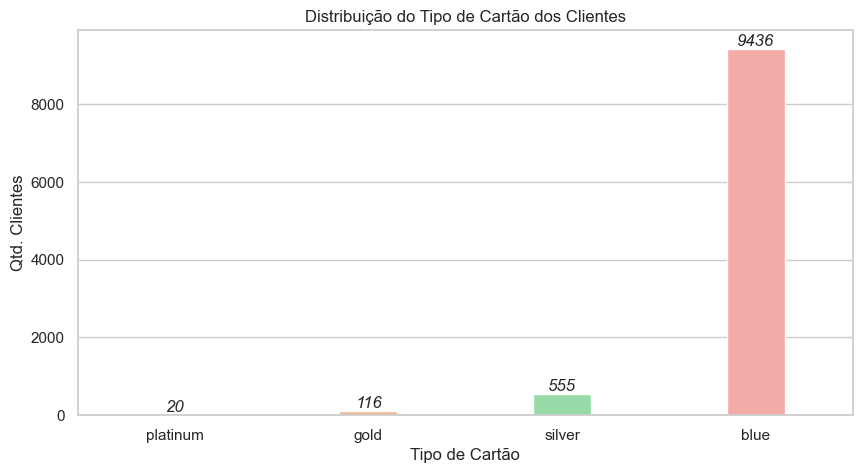

In [27]:
obj = plt.figure(figsize=(10,5))
sns.set_theme(style= 'whitegrid')

obj = sns.countplot(
    data = credit,
    x = 'tipo_cartao',
    width= 0.3,
    palette= sns.color_palette('pastel'),
    order= credit['tipo_cartao'].value_counts(ascending= True).index
)

obj.set_xlabel('Tipo de Cartão')
obj.set_ylabel('Qtd. Clientes')
obj.set_title('Distribuição do Tipo de Cartão dos Clientes')

for p in obj.patches:
    obj.annotate(f'{p.get_height():.0f}',
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', 
                 va='bottom',
                 fontstyle= 'oblique'
                 )

plt.show(obj)

> Primeiro ponto da análise, até o momento, que chama muita atenção. Aproximadamente 93% dos clientes possuem o mesmo tipo de cartão.

### Demais Variáveis Numéricas

* Estatísticas Descritivas

In [28]:
credit[['valor_transacoes_12m', 'limite_credito','qtd_transacoes_12m','meses_de_relacionamento','qtd_produtos']].describe().T

,count,mean,std,min,25%,50%,75%,max
valor_transacoes_12m,10127.00,4404.58,3397.13,510.16,2155.82,3899.59,4741.31,18484.93
limite_credito,10127.00,8632.44,9088.79,1438.00,2555.36,4549.42,11068.17,34516.99
qtd_transacoes_12m,10127.00,64.86,23.47,10.00,45.00,67.00,81.00,139.00
meses_de_relacionamento,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
qtd_produtos,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00


* Qual Valor Mensal Médio de Transações por Cliente? (Ultimos 12 meses)

In [29]:
round(credit['valor_transacoes_12m'].mean()/12,2)

367.05

* Valor Mensal de Transações (Ultimos 12 Meses)

In [30]:
round(credit['valor_transacoes_12m'].sum()/12,2)

3717101.04

* Quantidade de transações mensais (Ultimos 12 Meses)

In [31]:
int(credit['qtd_transacoes_12m'].sum()/12)

54735

* Quantidade média de transações mensais por cliente (Ultimos 12 Meses)

In [32]:
int(credit['qtd_transacoes_12m'].mean()/12)

5

## 2.2 EDA (Multivariada)

#### Existe um perfil de cliente específico dentre os que mais movimentam mais dinheiro?

In [33]:
credit['valor_transacoes_12m'].describe()

count   10127.00
mean     4404.58
std      3397.13
min       510.16
25%      2155.82
50%      3899.59
75%      4741.31
max     18484.93
Name: valor_transacoes_12m, dtype: float64

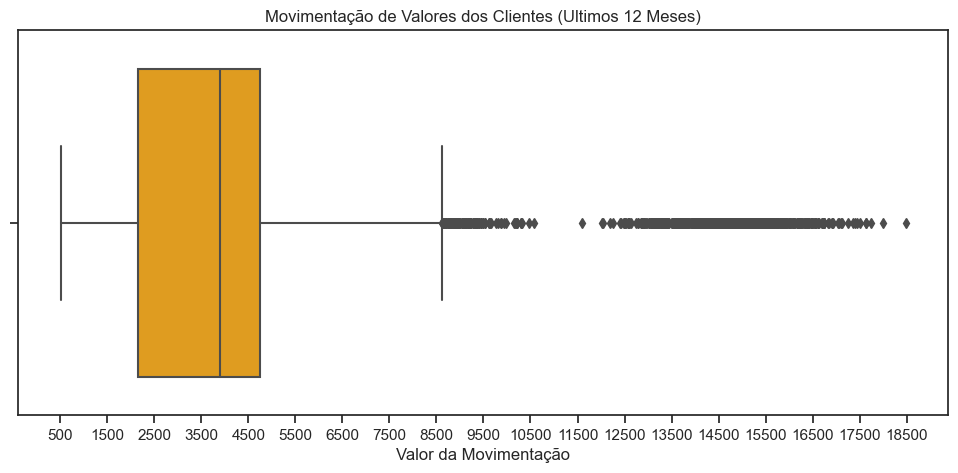

In [34]:
# Vamos gerar um boxplot para sabermos a partir de qual montante de valor movimentado devemos filtrar os dados

fig = plt.figure(figsize=(12,5))

fig = sns.set_theme(style='ticks')

ax = sns.boxplot(
    data = credit,
    x= 'valor_transacoes_12m',
    color= 'orange'
)

ax.set_xticks(np.arange(500,19000,1000))

ax.set_title('Movimentação de Valores dos Clientes (Ultimos 12 Meses)')

ax.set_xlabel('Valor da Movimentação')

plt.show()

Aparentemente as movimentações mais altas são a partir de 8500/ano.

In [35]:
# Vamos filtrar os dados com base na informação que descobrimos no boxplot

credit_filtrado_valor_transacoes = (
    credit
    .query('valor_transacoes_12m >= 8500')
    .reset_index()
    .copy()
)
credit_filtrado_valor_transacoes.head(2)

,index,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,8581,42,M,3,ensino medio,casado,$80K - $120K,blue,36,2,3,3,18177.60,8512.91,94
1,8591,50,M,3,ensino medio,solteiro,$80K - $120K,blue,39,3,2,3,21322.95,8693.28,91


In [36]:
# Agrupando os dados pelo salário anual
credit_filtrado_valor_transacoes_gp_salario = (
    credit_filtrado_valor_transacoes
    .groupby('salario_anual')
    .agg({'index' : 'count', 'valor_transacoes_12m' : 'sum'})
    .rename({'index':'contagem', 'valor_transacoes_12m' : 'total_movimentado'}, axis= 1)
    .sort_values(by= 'contagem', ascending= False)
    .copy()
)
credit_filtrado_valor_transacoes_gp_salario

,contagem,total_movimentado
salario_anual,,
menos que $40K,257,3570325.59
$80K - $120K,186,2459079.11
$40K - $60K,167,2247206.02
$60K - $80K,164,2229935.01
$120K +,83,1131194.45
na,72,983295.47


In [37]:
# Como a quantidade para cada categoria não é balanceada, vamos analisar a média
credit_filtrado_valor_transacoes_gp_salario['movimentacao_media_12m'] = credit_filtrado_valor_transacoes_gp_salario['total_movimentado']/credit_filtrado_valor_transacoes_gp_salario['contagem']
credit_filtrado_valor_transacoes_gp_salario

,contagem,total_movimentado,movimentacao_media_12m
salario_anual,,,
menos que $40K,257,3570325.59,13892.32
$80K - $120K,186,2459079.11,13220.86
$40K - $60K,167,2247206.02,13456.32
$60K - $80K,164,2229935.01,13597.16
$120K +,83,1131194.45,13628.85
na,72,983295.47,13656.88


In [38]:
# Olhando para o sexo do cliente
(
    credit_filtrado_valor_transacoes
    .groupby(['sexo'])
    .agg({'index' : 'count', 'valor_transacoes_12m' : 'sum'})
    .rename({'index':'contagem', 'valor_transacoes_12m' : 'total_movimentado'}, axis= 1)
    .sort_values(by= 'contagem', ascending= False)
    .copy()
)


,contagem,total_movimentado
sexo,,
M,571,7736841.38
F,358,4884194.27


In [39]:
# Olhando para a quantidade de dependentes
(
    credit_filtrado_valor_transacoes
    .groupby('dependentes')
    .agg({'index' : 'count', 'valor_transacoes_12m' : 'sum'})
    .rename({'index':'contagem', 'valor_transacoes_12m' : 'total_movimentado'}, axis= 1)
    .sort_values(by= 'contagem', ascending= False)
    .copy()
)

,contagem,total_movimentado
dependentes,,
2,260,3576306.22
3,209,2816998.22
1,190,2610294.62
4,139,1853015.54
0,82,1106689.50
5,49,657731.55


In [40]:
# Olhando para a escolaridade
(
    credit_filtrado_valor_transacoes
    .groupby('escolaridade')
    .agg({'index' : 'count', 'valor_transacoes_12m' : 'sum'})
    .rename({'index':'contagem', 'valor_transacoes_12m' : 'total_movimentado'}, axis= 1)
    .sort_values(by= 'contagem', ascending= False)
    .copy()
)

,contagem,total_movimentado
escolaridade,,
mestrado,291,3949519.42
ensino medio,188,2595785.77
na,146,1947697.35
sem educacao formal,144,1951024.74
doutorado,87,1180541.86
graduacao,73,996466.51


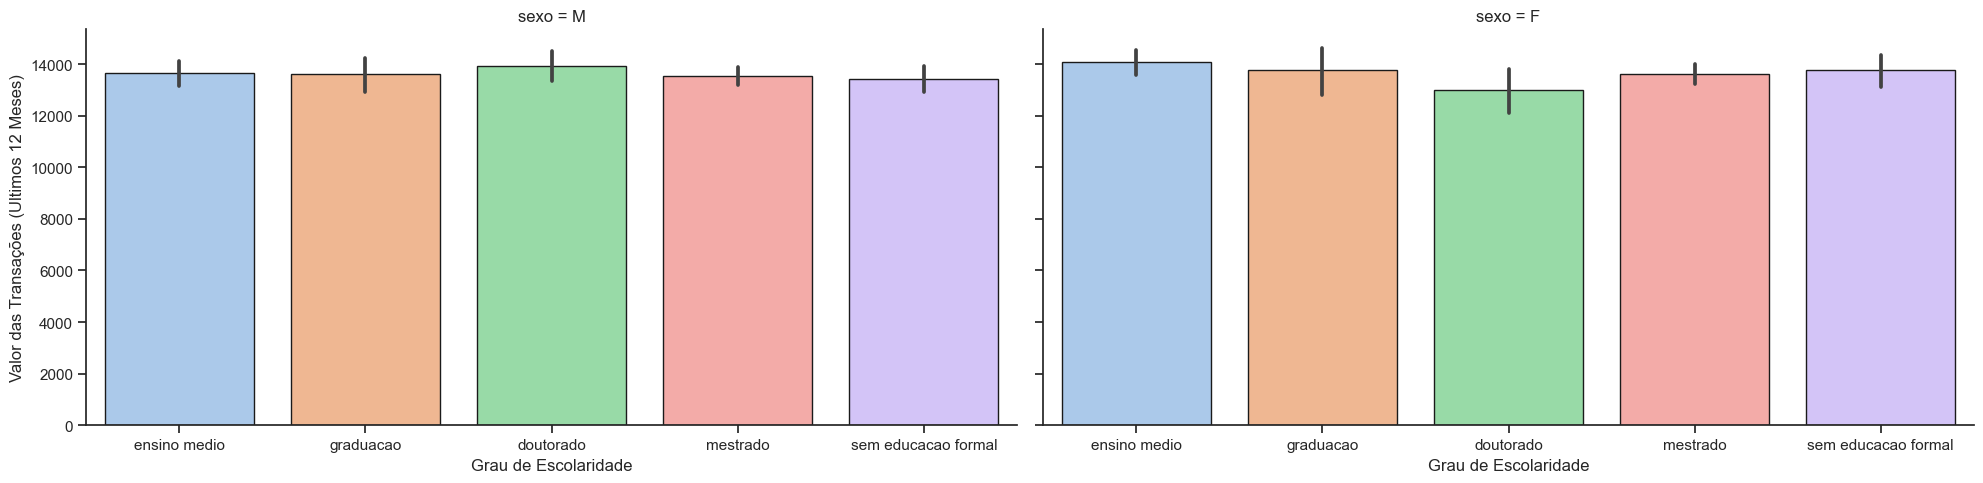

In [41]:
ax = sns.catplot(
    data = credit_filtrado_valor_transacoes.query('escolaridade != "na"'),
    x = 'escolaridade',
    y = 'valor_transacoes_12m',
    height = 5,
    aspect = 2,
    col= 'sexo',
    kind= 'bar',
    palette= 'pastel',
    edgecolor=".1"
)

ax.set(xlabel= 'Grau de Escolaridade', ylabel= 'Valor das Transações (Ultimos 12 Meses)')

plt.show()

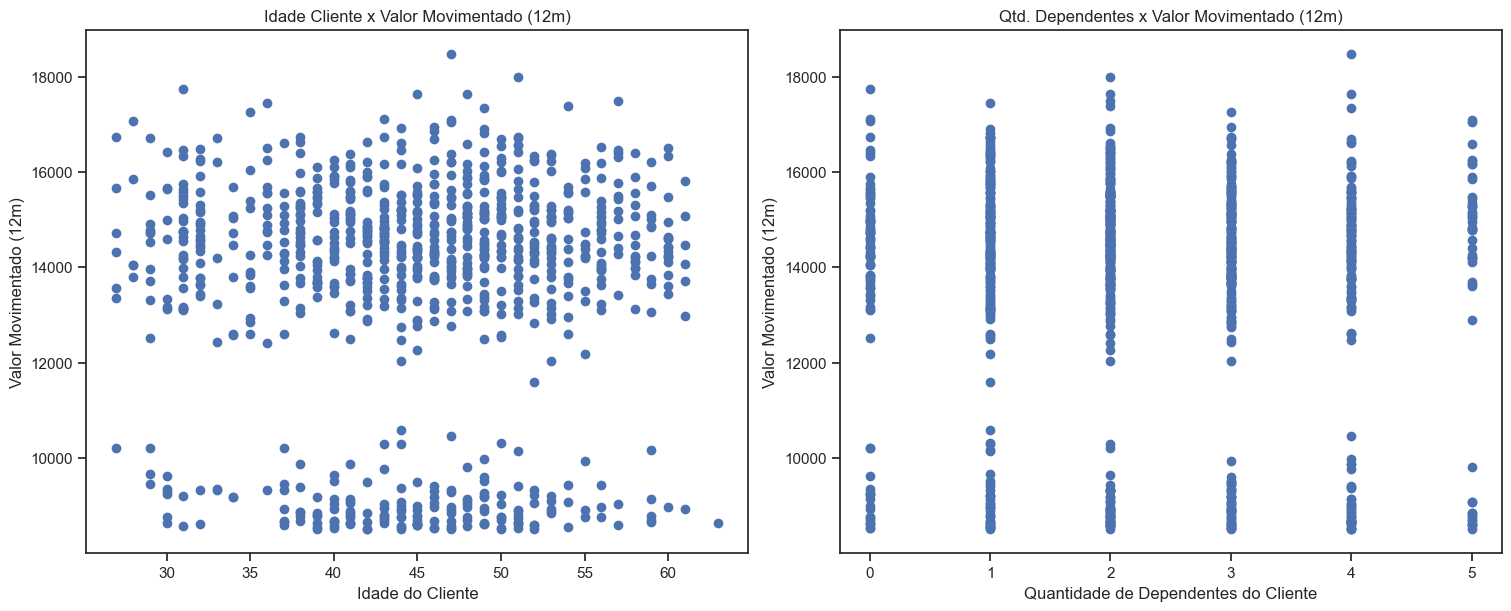

In [42]:
fig = plt.figure(figsize=(15,6), layout= 'constrained')

ax = fig.subplot_mosaic([['a','b']])

ax['a'].scatter(
    x= credit_filtrado_valor_transacoes['idade'],
    y= credit_filtrado_valor_transacoes['valor_transacoes_12m']
)

ax['a'].set_xlabel('Idade do Cliente')
ax['a'].set_ylabel('Valor Movimentado (12m)')
ax['a'].set_title('Idade Cliente x Valor Movimentado (12m)')

ax['b'].scatter(
    x= credit_filtrado_valor_transacoes['dependentes'],
    y= credit_filtrado_valor_transacoes['valor_transacoes_12m']
)

ax['b'].set_xlabel('Quantidade de Dependentes do Cliente')
ax['b'].set_ylabel('Valor Movimentado (12m)')
ax['b'].set_title('Qtd. Dependentes x Valor Movimentado (12m)')

plt.show()

> Informações Extraídas:

1. Ao olhar a média dos valores movimentados, agrupados pelo salário anual, vemos que todas as classes são bem parecidas, embora exista uma diferença na quantidade de clientes que pertencem a cada classe. Isso pode indicar que o salário anual não importa muito quando queremos diferenciar os clientes com base no montante movimentado anualmente.

2. Quando segmentamos pelo genero e escolaridade, não notamos nenhuma diferença significativa. Porém, observando de maneira geral, homens possuem movimentações maiores que as mulheres.

3. Não existe correlação entre idade e valor movimentado.

4. Não existe correlação entre quantidade de dependentes e valor movimentado.

#### Existe correlação entre limite de crédito e montante movimentado? E Em relação a quantidade de produtos?

In [43]:
# Analisando Numericamente 
credit[['qtd_produtos','limite_credito','valor_transacoes_12m']].corr()

,qtd_produtos,limite_credito,valor_transacoes_12m
qtd_produtos,1.00,-0.07,-0.35
limite_credito,-0.07,1.00,0.17
valor_transacoes_12m,-0.35,0.17,1.00


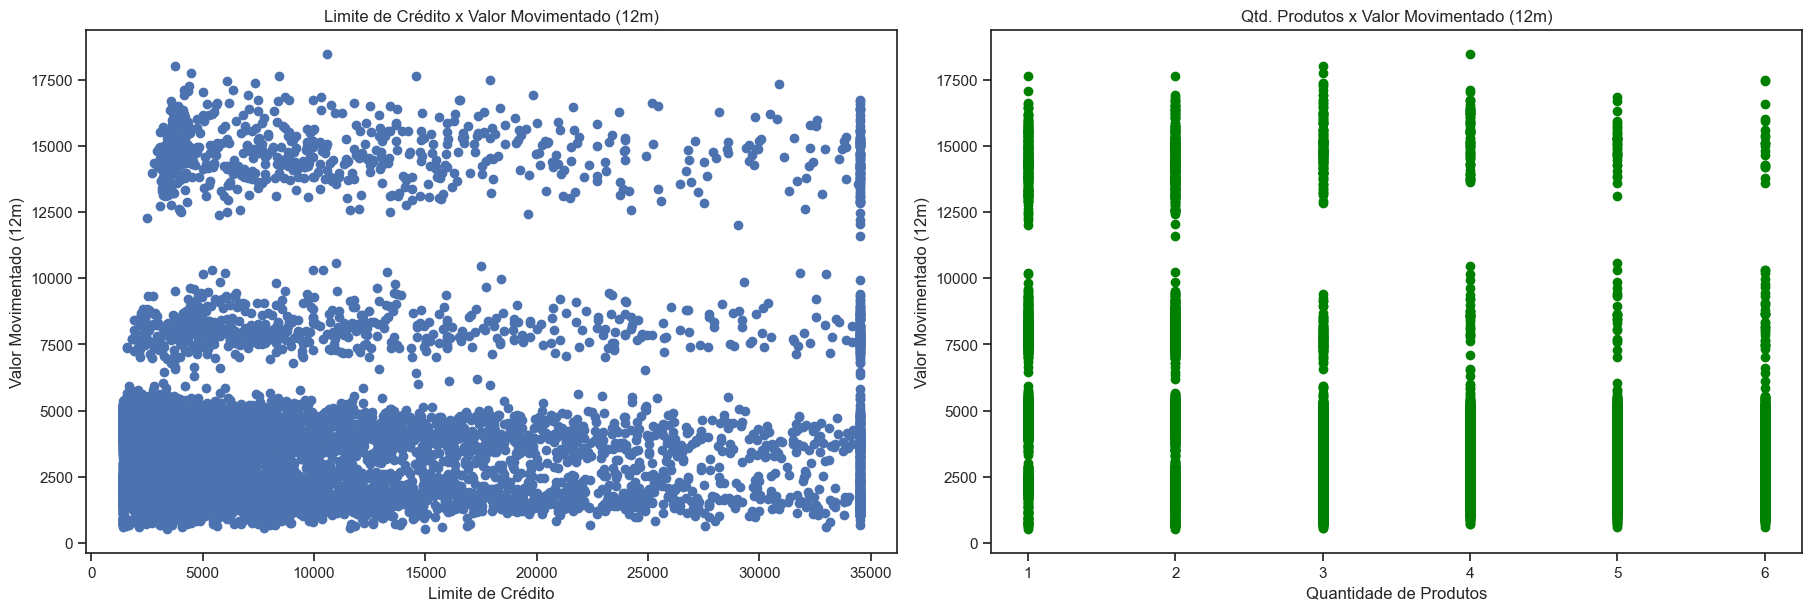

In [44]:
# Analisando Graficamente
fig = plt.figure(figsize= (18,6), layout= 'constrained')

ax = fig.subplot_mosaic([['a','b']])


ax['a'].scatter(
    x= credit['limite_credito'],
    y= credit['valor_transacoes_12m']
)

ax['a'].set_xlabel('Limite de Crédito')
ax['a'].set_ylabel('Valor Movimentado (12m)')
ax['a'].set_title('Limite de Crédito x Valor Movimentado (12m)')


ax['b'].scatter(
    x= credit['qtd_produtos'],
    y= credit['valor_transacoes_12m'],
    color = 'green'
)

ax['b'].set_xlabel('Quantidade de Produtos')
ax['b'].set_ylabel('Valor Movimentado (12m)')
ax['b'].set_title('Qtd. Produtos x Valor Movimentado (12m)')

plt.show()

> Resposta: Não existe correlação.

#### Clientes mais antigos possuem mais produtos?

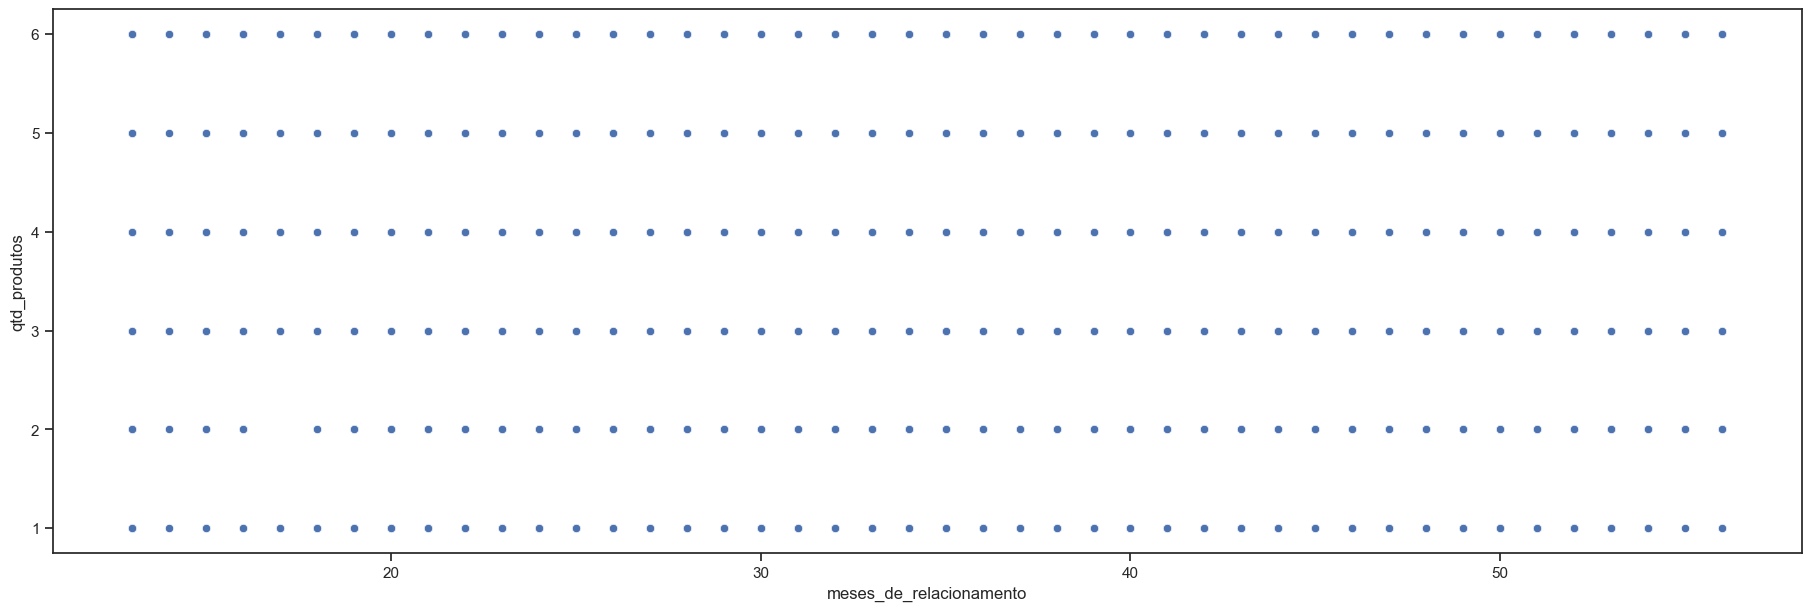

In [45]:
# Analisando Graficamente
fig = plt.figure(figsize= (18,6), layout= 'constrained')

sns.scatterplot(
    data= credit,
    x = 'meses_de_relacionamento',
    y= 'qtd_produtos'
)

plt.show()

> Resposta: Não existe correlação entre quantidade de produtos e tempo de relacionamento do cliente.

#### Como o Limite de Crédito está distribuído entre os clientes?

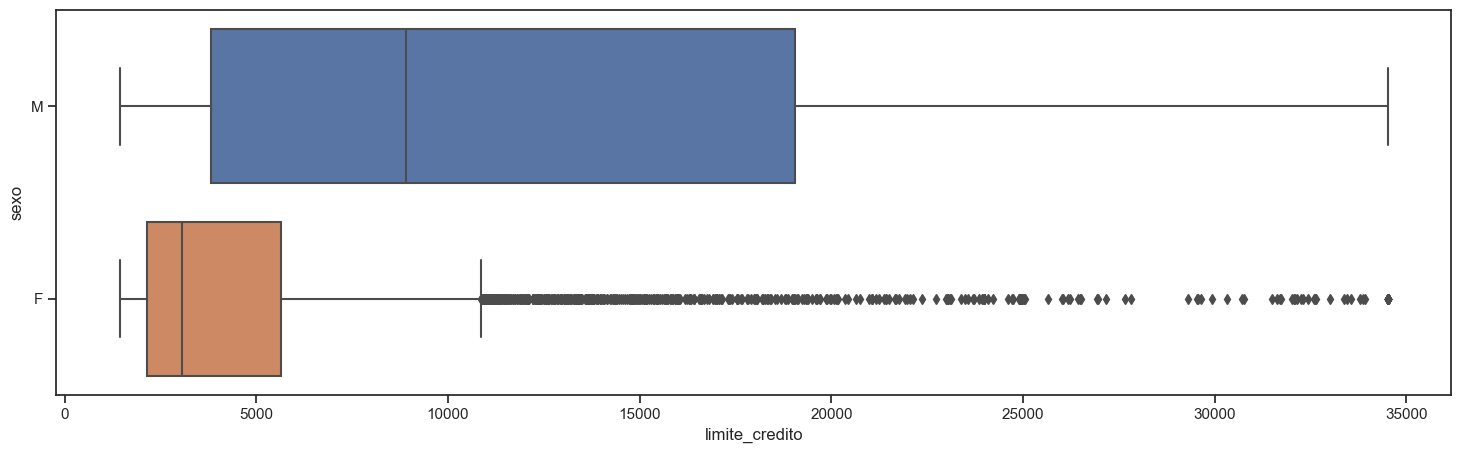

In [46]:
fig = plt.figure(figsize=(18,5))

ax = sns.boxplot(
    data= credit,
    x= 'limite_credito',
    y= 'sexo'
)

plt.show()

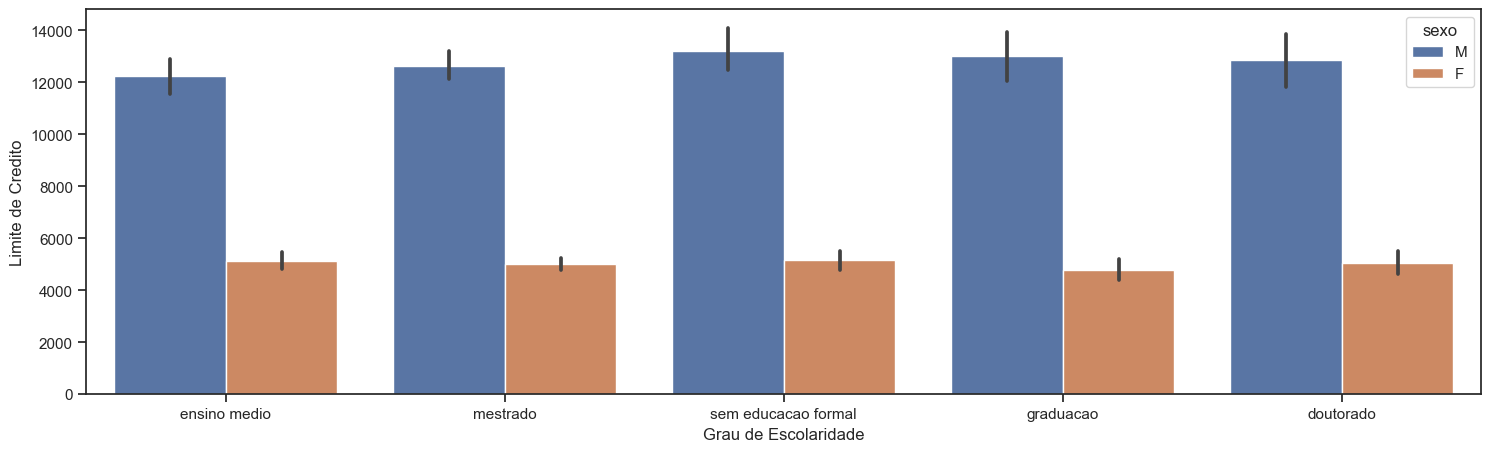

In [47]:
fig = plt.figure(figsize=(18,5))

ax = sns.barplot(
    data= credit.query('escolaridade != "na"'),
    x= 'escolaridade',
    y= 'limite_credito',
    hue= 'sexo'
)

ax.set_xlabel('Grau de Escolaridade')
ax.set_ylabel('Limite de Credito')

plt.show()

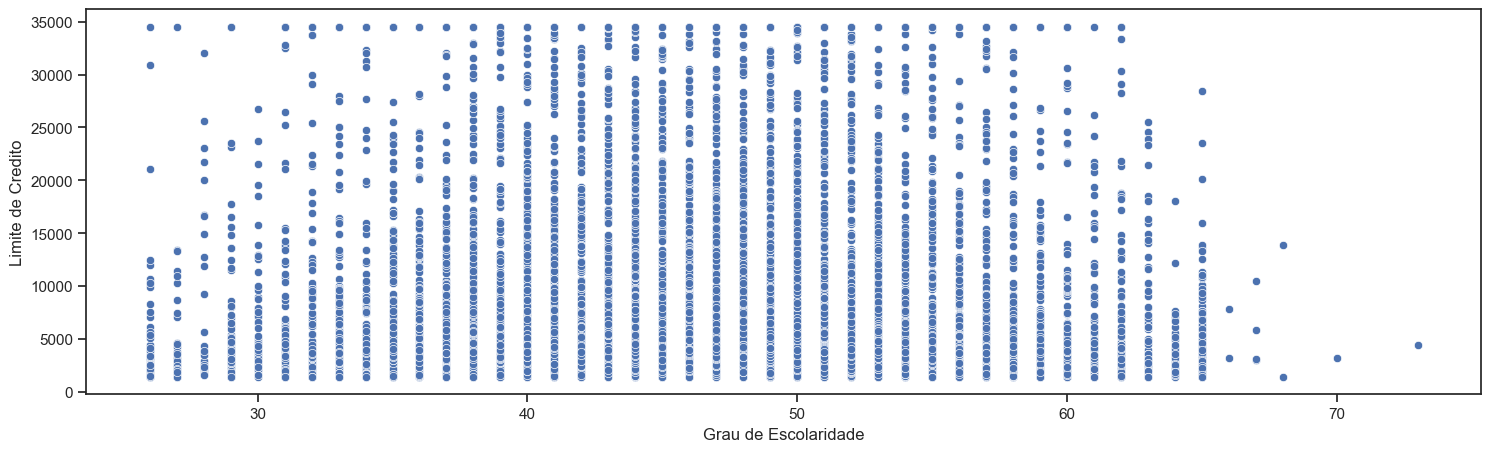

In [48]:
fig = plt.figure(figsize=(18,5))

ax = sns.scatterplot(
    data= credit,
    x= 'idade',
    y= 'limite_credito'
)

ax.set_xlabel('Grau de Escolaridade')
ax.set_ylabel('Limite de Credito')

plt.show()

In [49]:
credit.query('salario_anual != "na"').groupby(['salario_anual','sexo']).agg({'sexo' : 'count'})

sexo
salario_anual  sexo      
$120K +        M      727
$40K - $60K    F     1014
               M      776
$60K - $80K    M     1402
$80K - $120K   M     1535
menos que $40K F     3284
               M      277

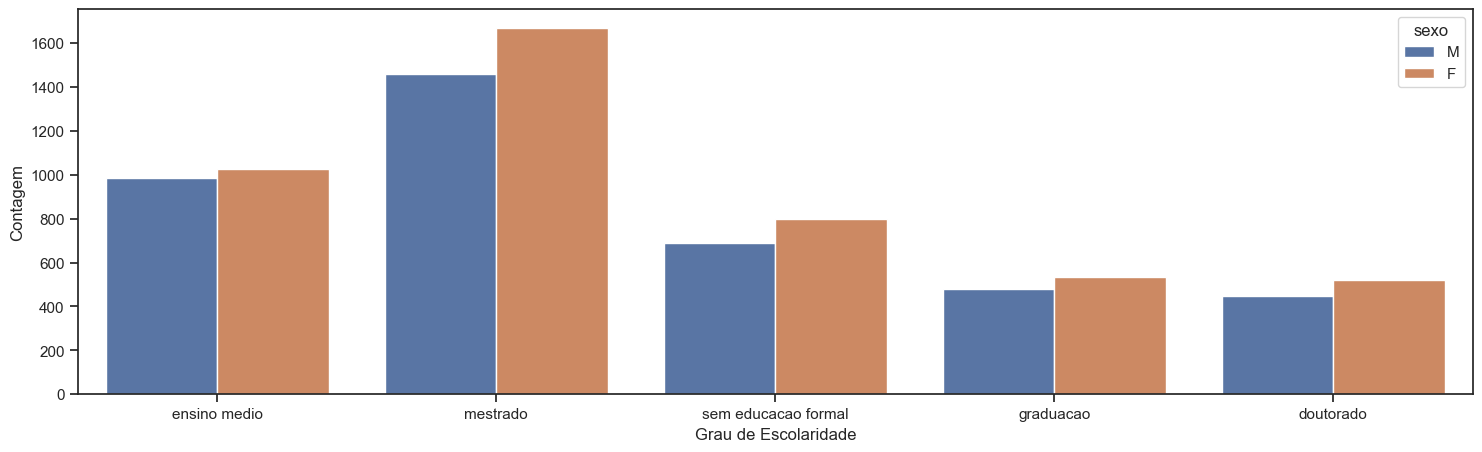

In [50]:
fig = plt.figure(figsize=(18,5))

ax = sns.countplot(
    data= credit.query('escolaridade != "na"'),
    x= 'escolaridade',
    hue= 'sexo'
)

ax.set_xlabel('Grau de Escolaridade')
ax.set_ylabel('Contagem')

plt.show()

> Resposta: Mesmo em um ambiente que existam o mesmo número de homens e mulheres, os homens possuem mais limite de crédito mesmo quando possuem o mesmo grau de escolaridade. Quando olhamos mais a fundo, notamos que não existe nenhuma mulher com salário maior que 60mil/ano e, dentre os que recebem menos por ano, as mulheres são a grande maioria. Este cenário ocorre mesmo com as mulheres não estando sub-representadas em nenhuma grau de escolaridade.

#### O cliente que possui mais produtos é o que movimenta mais dinheiro/possui maior limite de crédito/realiza mais transacoes?

In [51]:
credit_mean_by_product = (
    credit
    .groupby('qtd_produtos')
    .agg({
        'valor_transacoes_12m' : 'mean',
        'limite_credito' : 'mean',
        'qtd_transacoes_12m' : 'mean',
        'sexo' : 'count'
    })
    .rename({'sexo' : 'contagem'}, axis= 1)
    .reset_index()
    .copy()
)

credit_mean_by_product

,qtd_produtos,valor_transacoes_12m,limite_credito,qtd_transacoes_12m,contagem
0,1,7253.40,10186.23,79.62,910
1,2,7019.65,10294.59,77.08,1243
2,3,3936.78,8311.70,62.11,2305
3,4,3755.47,8212.70,61.75,1912
4,5,3515.82,7945.67,60.81,1891
5,6,3416.96,8289.75,60.20,1866


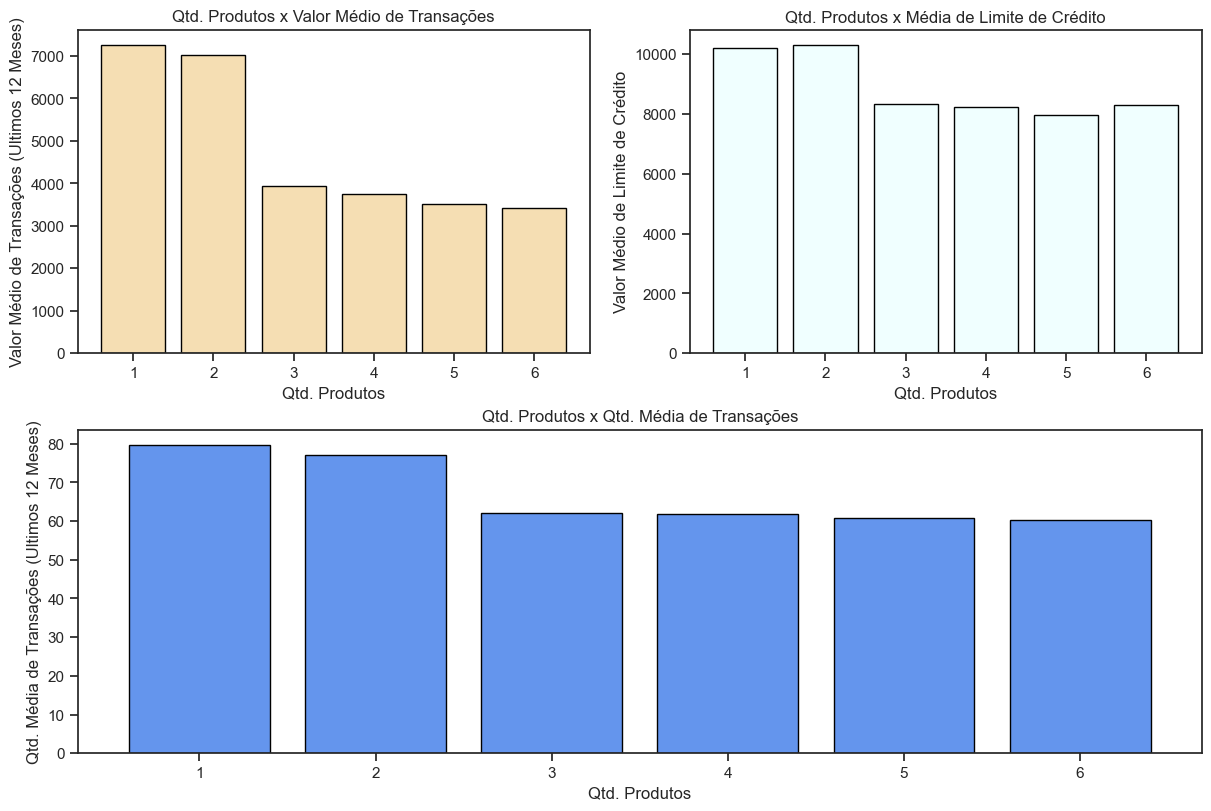

In [52]:
fig = plt.figure(figsize= (12,8), layout= 'constrained')

ax = fig.subplot_mosaic([
    ['a','b'],
    ['c','c']
])


ax['a'].bar(
    x= credit_mean_by_product['qtd_produtos'],
    height= credit_mean_by_product['valor_transacoes_12m'],
    color = 'wheat',
    edgecolor = 'black'
)

ax['a'].set_xlabel('Qtd. Produtos')
ax['a'].set_ylabel('Valor Médio de Transações (Ultimos 12 Meses)')
ax['a'].set_title('Qtd. Produtos x Valor Médio de Transações')

ax['b'].bar(
    x= credit_mean_by_product['qtd_produtos'],
    height= credit_mean_by_product['limite_credito'],
    color = 'azure',
    edgecolor = 'black'
)

ax['b'].set_xlabel('Qtd. Produtos')
ax['b'].set_ylabel('Valor Médio de Limite de Crédito')
ax['b'].set_title('Qtd. Produtos x Média de Limite de Crédito')

ax['c'].bar(
    x= credit_mean_by_product['qtd_produtos'],
    height= credit_mean_by_product['qtd_transacoes_12m'],
    color = 'cornflowerblue',
    edgecolor = 'black'
)

ax['c'].set_xlabel('Qtd. Produtos')
ax['c'].set_ylabel('Qtd. Média de Transações (Ultimos 12 Meses)')
ax['c'].set_title('Qtd. Produtos x Qtd. Média de Transações')


plt.show()

> Resposta: A situação observada é inversa da hipótese: Clientes com até 2 produtos realizam mais transações, movimentam mais dinheiros e, por consequencia, possuem mais limite de crédito.

## 4. Questões a serem respondidas futuramente

> Existe um perfil de cliente que...

a. Realizou mais transações?

b. Possui menor inatividade?

c. Possui os tipos de cartãos mais exclusivos?

d. Existem grupos escondidos nos dados? (usar clustering)